In [5]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

In [6]:
df_raw = pd.read_csv("/home/piai/Downloads/체질검사.csv", engine="python")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [8]:
#목표 변수, 설명 변수 데이터 지정
df_raw_y = df_raw["FAT"]

from sklearn.model_selection import GridSearchCV
df_raw_x = df_raw.drop("FAT", axis=1, inplace = False)

In [9]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, \
                                                               test_size =0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
train data X size : (76, 13)
train data Y size : (76,)


In [11]:
#모델 생성
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

#Train 데이터 설명력 validation
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))

#Test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))


Score on training set: 1.000
Score on test set: 0.295


#### => train 데이터는 설명력은 100%, 반면 test 데이터 설명력은 아주 낮음: 
#### 모델은 train 데이터에 과대적합(overfitting)

In [14]:
# 현재 생성된 트리 모델의 옵션 확인
tree_uncustomized

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

#### 모델 Parameter 조정
- min_samples_leaf: 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [15]:
train_score = []; test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]
for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234,\
                                min_samples_leaf = v_min_samples_leaf)
    
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
#결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["TestScore"]=test_score

In [16]:
df_score_leaf.round(3) #모델 설명력 확인

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.295
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


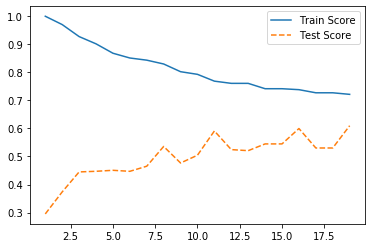

In [17]:
# 모델 설명력에 대한 그래프 확인

plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

In [ ]:
# 잎사귀 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소하며 Train/test 데이터의 성능 변화를 고려하여 8 선택

In [18]:
#잎사귀 노드의 최소 자료수 변경에 따른 모델 성능: 8일때와 16일때 비교 분석 (gap이 적을 때)

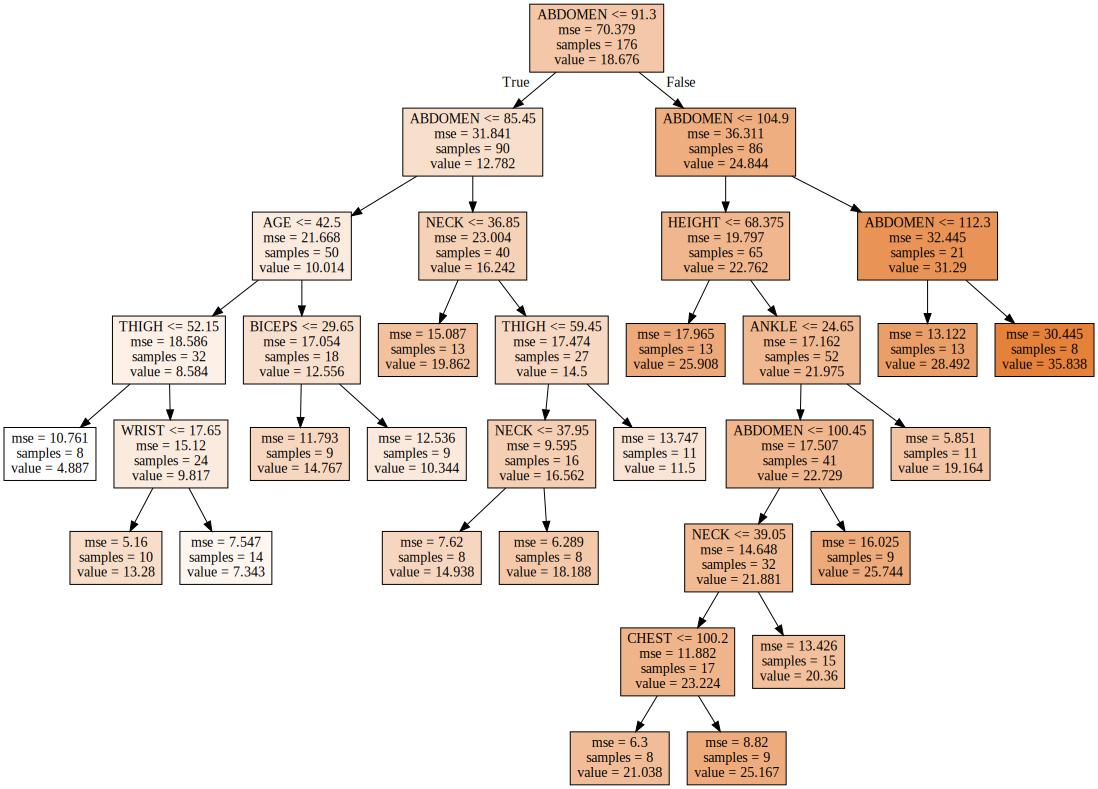

In [20]:
v_feature_name = df_train_x.columns

tree_graph = DecisionTreeRegressor(min_samples_leaf = 8, random_state =1234)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph,out_file="tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled =True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

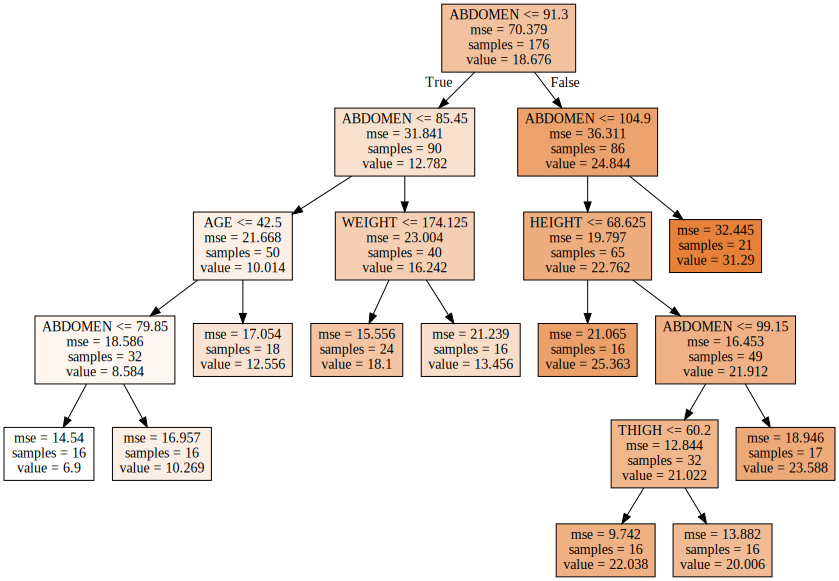

In [24]:
v_feature_name = df_train_x.columns

tree_graph = DecisionTreeRegressor(min_samples_leaf = 16, random_state =1234)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph,out_file="tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled =True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [30]:
train_score = []; test_score = []

para_split = [n_split * 2 for n_split in range(2,20)]
for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(min_samples_leaf = 8, min_samples_split = v_min_samples_split,
                                 random_state=1234)
    
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
#결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"]=para_split
df_score_split["TrainScore"]=train_score
df_score_split["TestScore"]=test_score

In [31]:
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.830,0.536
1,6,0.830,0.536
2,8,0.830,0.536
3,10,0.830,0.536
4,12,0.830,0.536
5,14,0.830,0.536
6,16,0.830,0.536
7,18,0.821,0.557
8,20,0.813,0.581
9,22,0.792,0.567


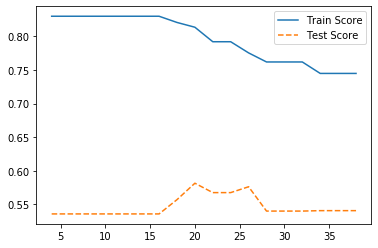

In [32]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

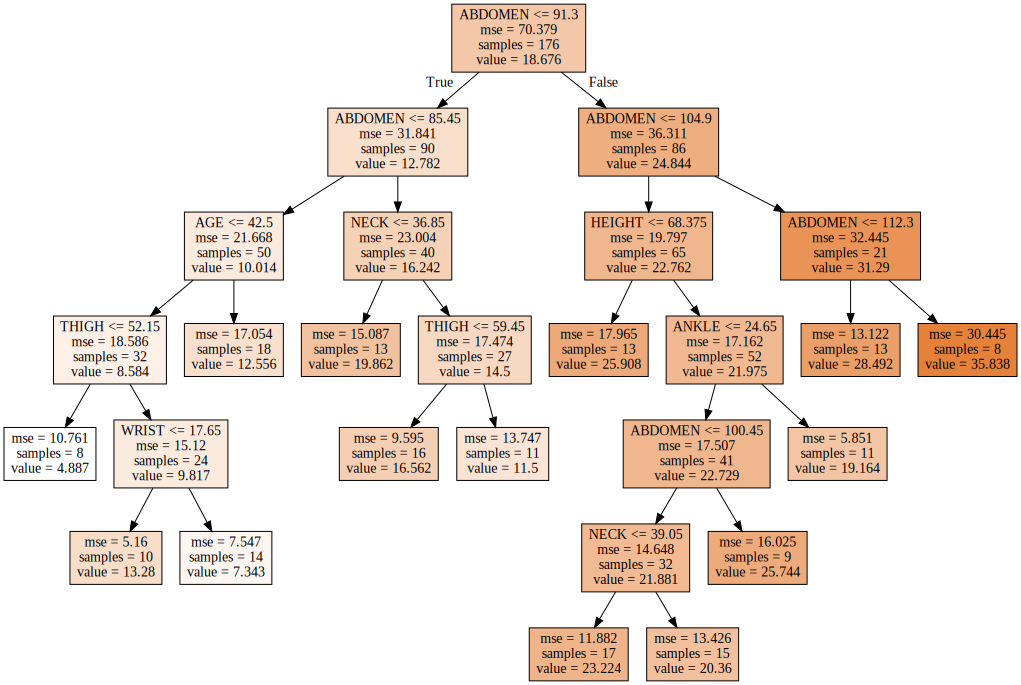

In [36]:
tree_graph = DecisionTreeRegressor(random_state =1234, min_samples_leaf = 8, min_samples_split=20)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot",\
               feature_names = v_feature_name, impurity=True, filled = True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [37]:
train_score = []; test_score = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(min_samples_leaf = 8, min_samples_split = 20,
                                 max_depth = v_max_depth,\
                                 random_state=1234)
    
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
#결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["TestScore"]=test_score

In [38]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.517,0.333
1,2,0.679,0.569
2,3,0.749,0.538
3,4,0.783,0.570
4,5,0.808,0.581
5,6,0.813,0.581
6,7,0.813,0.581
7,8,0.813,0.581
8,9,0.813,0.581
9,10,0.813,0.581


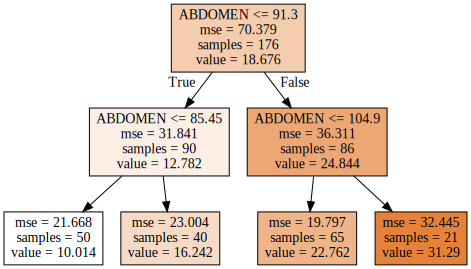

In [42]:
# max depth = 2

tree_graph = DecisionTreeRegressor(random_state =1234, min_samples_leaf = 8, min_samples_split=20, max_depth=2)
tree_graph.fit(df_train_x,df_train_y)

export_graphviz(tree_graph, out_file="tree_depth.dot",\
               feature_names = v_feature_name, impurity=True, filled = True)
with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

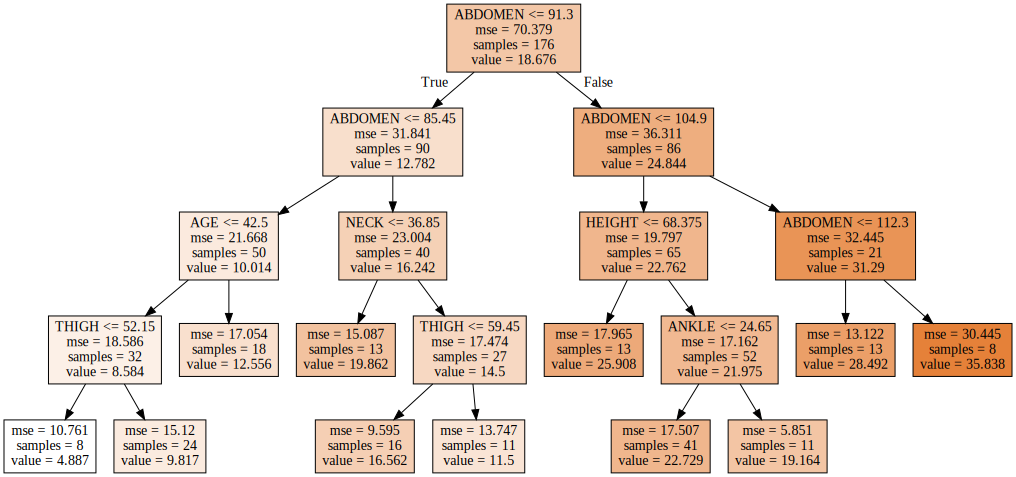

In [43]:
# max depth = 4

tree_graph = DecisionTreeRegressor(random_state =1234, min_samples_leaf = 8, min_samples_split=20, max_depth=4)
tree_graph.fit(df_train_x,df_train_y)

export_graphviz(tree_graph, out_file="tree_depth.dot",\
               feature_names = v_feature_name, impurity=True, filled = True)
with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [46]:
tree_final = DecisionTreeRegressor(random_state =1234, min_samples_leaf = 8, min_samples_split=20,max_depth=4)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=8, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [47]:
print("Score on training set:{:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Score on test set:{:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set:0.783
Score on test set:0.570


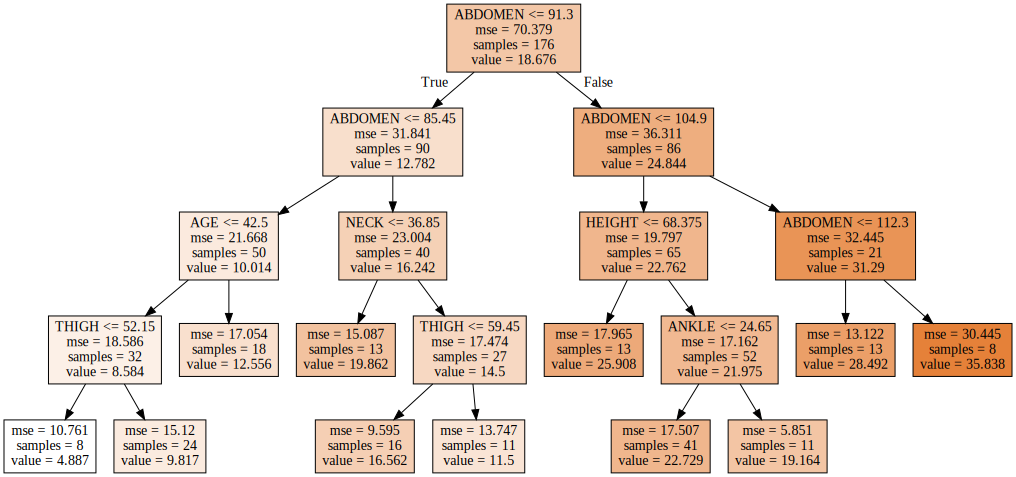

In [48]:
export_graphviz(tree_final, out_file="tree_final.dot", 
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [49]:
# feature_importance_: 설명변수의 중요도
# tree_final.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬split 
df_importance.sort_values("Importance",ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.895
7,THIGH,0.032
3,NECK,0.026
0,AGE,0.019
2,HEIGHT,0.017
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000


Text(0, 0.5, '변수')

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: Runtim

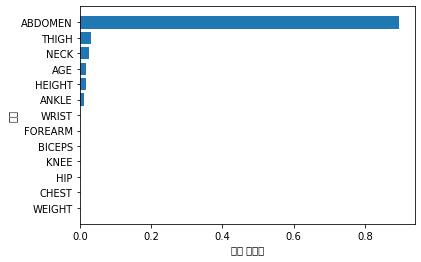

In [50]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [51]:
estimator = DecisionTreeRegressor()

#구하고자 하는 parameter와 범위.
param_grid = {"criterion": ["mse", "friedman_mse","mae"], "max_features":["auto","sqrt","log2"],
             "max_depth":para_depth, "min_samples_split":para_split, "min_samples_split": para_leaf}

#설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator: 
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

best parameter: 
{'criterion': 'mae', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 4}

best score: 
0.596
